In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Cleanup the data, including the readability of the dataset

In [3]:
names = ['Cultivator', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv('wine_fraud.csv', names=names, header=0)
df

,Cultivator,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Categorical vs numeric columns
All columns are numeric.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivator                    178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# EDA
There are no missing values.

In [5]:
for i in df.columns:
    print(f'column {i}: {df[i].unique()}')

column Cultivator: [1 2 3]
column Alcohol: [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
column Malic acid: [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99

# K-Means analysis
We want to find the optimal number of clusters. If we look at the scree plot, the optimal cluster is around 6.

In [6]:
# split data into features and target
X = df.iloc[:,1:14]
y = df.iloc[:,0]

In [7]:
# Using within sum of squares to determine the optimal number of clusters
sum_sq= []

for n in range (2,30):
    print('Calculating for ',n,' clusters')
    model = KMeans(n_clusters=n, random_state=3)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


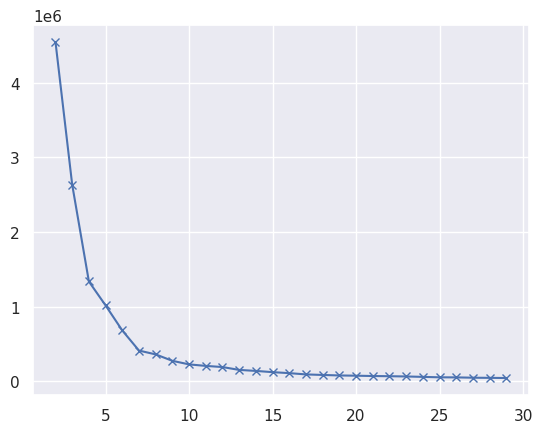

In [8]:
# scree plot to visually see the optimal number of clusters
plt.plot(range(2, 30), sum_sq, 'bx-')

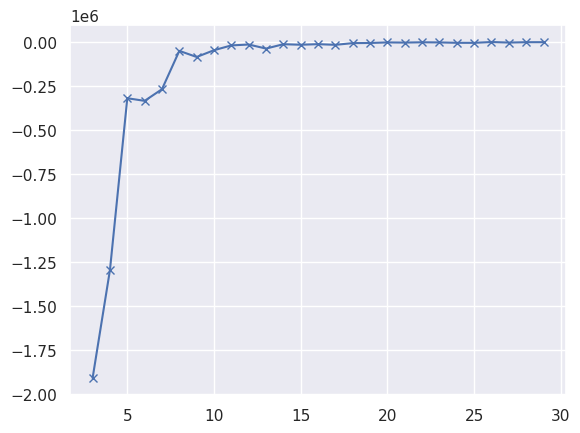

In [9]:
plt.plot(range(3, 30), np.diff(sum_sq), 'bx-')

In [10]:
# kmeans model with the optimal number of clusters, 6 clusters
model = KMeans(n_clusters=6, random_state=3)
model.fit(X)
preds= model.predict(X)

In [11]:
preds

array([2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 5, 5, 5,
       2, 2, 5, 5, 2, 1, 5, 2, 1, 1, 2, 1, 2, 5, 5, 2, 2, 5, 5, 2, 2, 0,
       5, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 4, 0, 4, 0, 3, 3, 0,
       4, 4, 0, 0, 5, 3, 4, 2, 5, 3, 3, 4, 0, 4, 3, 0, 0, 4, 4, 4, 4, 4,
       0, 0, 4, 4, 4, 3, 3, 5, 0, 3, 0, 3, 0, 4, 3, 3, 0, 3, 4, 4, 3, 0,
       4, 3, 0, 3, 3, 3, 4, 3, 3, 4, 0, 4, 3, 3, 3, 3, 3, 4, 3, 4, 0, 4,
       4, 0, 0, 0, 0, 4, 4, 4, 0, 5, 4, 4, 5, 5, 3, 0, 0, 4, 4, 4, 3, 0,
       0, 0, 4, 5, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 5,
       5, 4], dtype=int32)

# Cluster the wines to see if there are some natural groupings

In [12]:
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.5427958922515395

# Use PCA to plot the clusters

Text(0, 0.5, 'PC2')

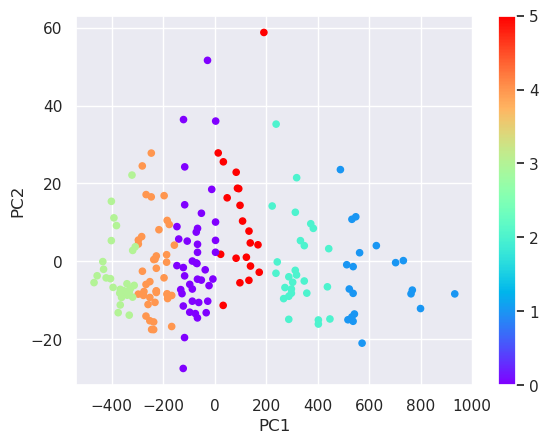

In [15]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Eventhough, the scree plot showed 6 clusters to be optimal, the silhouette score shows that 2 clusters is the most optimal.

In [16]:
# fit the model for a range of 2 to 30 clusters and add to sum_sq[]
for n in range (2,30):
    model = KMeans(n_clusters=n, random_state=3)
    model.fit(X)
    # gather the predictions
    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.6568536504294317
Silhouette score for  3  clusters:  0.5595823478987215
Silhouette score for  4  clusters:  0.5572288268257268
Silhouette score for  5  clusters:  0.5179001162371398
Silhouette score for  6  clusters:  0.5427958922515395
Silhouette score for  7  clusters:  0.5616196384056887
Silhouette score for  8  clusters:  0.5455813434068202
Silhouette score for  9  clusters:  0.5366864240899473
Silhouette score for  10  clusters:  0.5202440098793369
Silhouette score for  11  clusters:  0.5109256387090504
Silhouette score for  12  clusters:  0.4915566824316121
Silhouette score for  13  clusters:  0.4881077989643448
Silhouette score for  14  clusters:  0.4992005858663204
Silhouette score for  15  clusters:  0.4948971372637863
Silhouette score for  16  clusters:  0.4930625592549507
Silhouette score for  17  clusters:  0.48968516338369816
Silhouette score for  18  clusters:  0.47388939486713194
Silhouette score for  19  clusters:  0.465931457816967

Since we all know there are 3 clusters in the dataset. We'll analyze 3 clusters.

In [17]:
model = KMeans(n_clusters=3, random_state=3)
model.fit(X)
preds= model.predict(X)

score = metrics.silhouette_score(X, preds)
score

0.5595823478987215

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

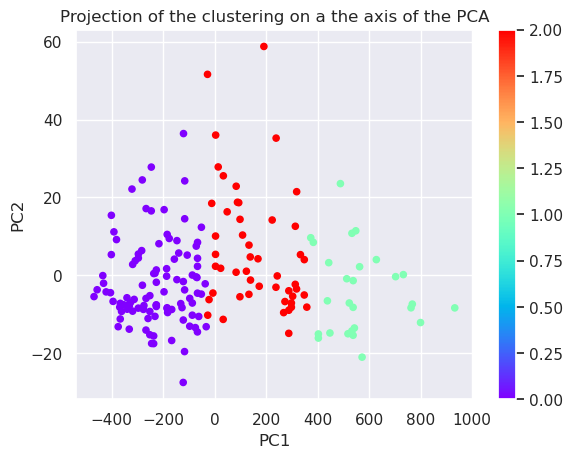

In [18]:
# visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

# Would normalizing your dataset help?

We normalize the data using `StandardScaler`, but it's worse than the initial performance

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
clt = KMeans(n_clusters=3, random_state=3)
model = clt.fit(X_std)
prediction = clt.predict(X_std)
acc = metrics.silhouette_score(X_std, prediction)
acc

0.28485891918989864